### Word2vec provides direct access to vector representations of words

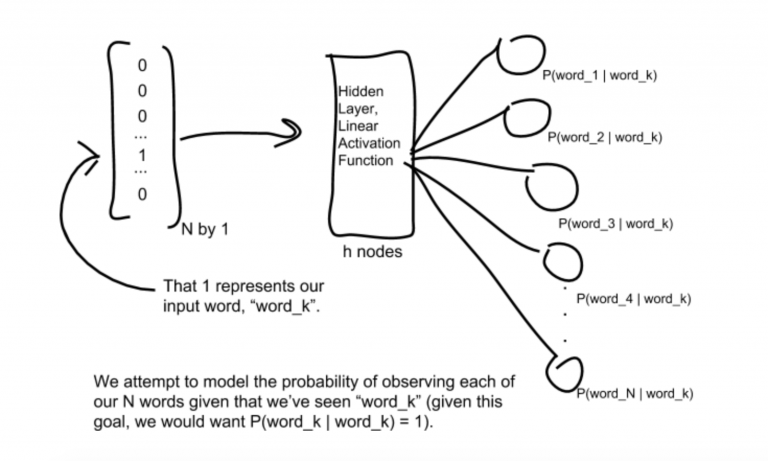

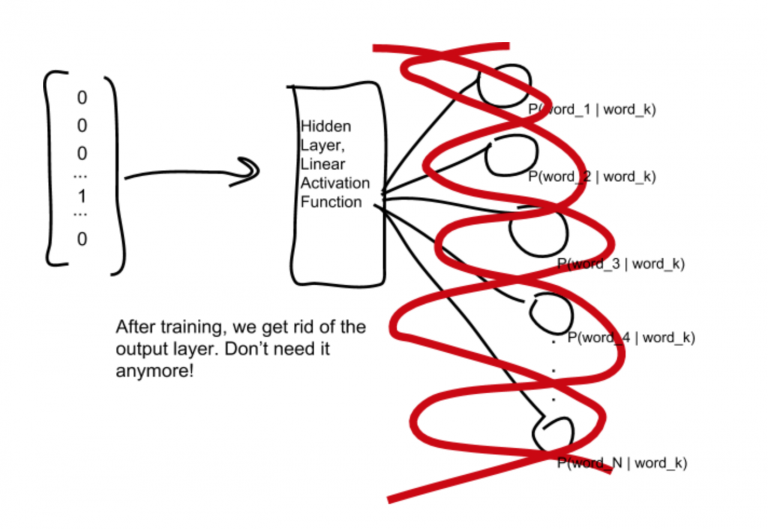

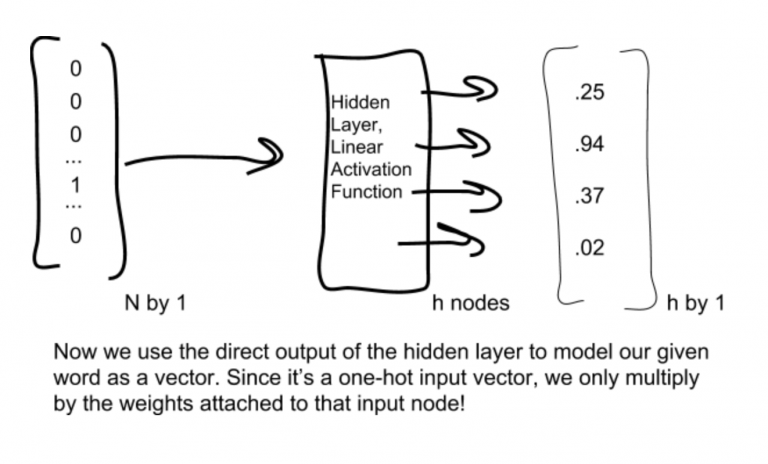

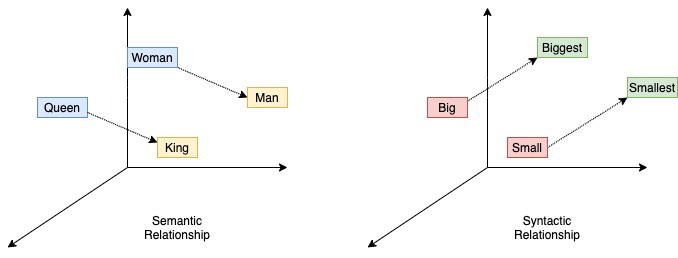

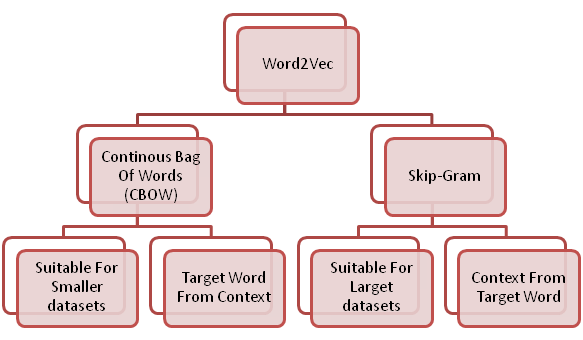

### <u>What are Word Embeddings?<u>

#### It is an approach for representing words and documents. Word Embedding or Word Vector is a numeric vector input that represents a word in a lower-dimensional space. It allows words with similar meaning to have a similar representation. They can also approximate meaning. A word vector with 50 values can represent 50 unique features.

#### Features: Anything that relates words to one another. Eg: Age, Sports, Fitness, Employed etc. Each word vector has values corresponding to these features.

### <u>Goal of Word Embeddings<u>

- To reduce dimensionality
- To use a word to predict the words around it
- Inter word semantics must be captured

### <u>How are Word Embeddings used?<u>

- They are used as input to machine learning models.
- Take the words ---> Give their numeric representation ---> Use in training or inference
- To represent or visualize any underlying patterns of usage in the corpus that was used to train them.

### <u>Implementations of Word Embeddings:<u>

**Word Embeddings are a method of extracting features out of text so that we can input those features into a machine learning model to work with text data. They try to preserve syntactical and semantic information. The methods such as Bag of Words(BOW), CountVectorizer and TFIDF rely on the word count in a sentence but do not save any syntactical or semantic information. In these algorithms, the size of the vector is the number of elements in the vocabulary. We can get a sparse matrix if most of the elements are zero. Large input vectors will mean a huge number of weights which will result in high computation required for training. Word Embeddings give a solution to these problems.**

**Let’s take an example to understand how word vector is generated by taking emoticons which are most frequently used in certain conditions and transform each emoji into a vector and the conditions will be our features.**



| Happy | ??? | ??? | ??? |
|-------|-----|-----|-----|
| Sad | ??? | ??? | ??? |
| Excited | ??? | ??? | ??? |
| Sick | ??? | ??? | ??? |

The emoji vectors for the emojis will be:
     [happy,sad,excited,sick]
     
     
???? =[1,0,1,0]


???? =[0,1,0,1]


???? =[0,0,1,1]


.....

### <u>Continuous Bag OF Words (CBOW)<u>

### What is the CBOW Model?

**The CBOW model tries to understand the context of the words and takes this as input. It then tries to predict words that are contextually accurate. Let us consider an example for understanding this. Consider the sentence: ‘It is a pleasant day’ and the word ‘pleasant’ goes as input to the neural network. We are trying to predict the word ‘day’ here. We will use the one-hot encoding for the input words and measure the error rates with the one-hot encoded target word. Doing this will help us predict the output based on the word with least error.**

### The Model Architecture

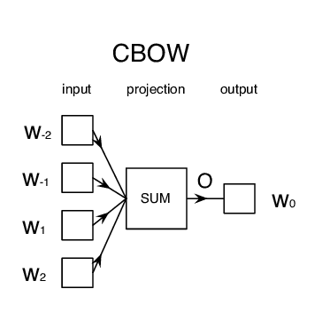

**The CBOW model architecture is as shown above. The model tries to predict the target word by trying to understand the context of the surrounding words. Consider the same sentence as above, ‘It is a pleasant day’.The model converts this sentence into word pairs in the form (contextword, targetword). The user will have to set the window size. If the window for the context word is 2 then the word pairs would look like this: ([it, a], is), ([is, pleasant], a),([a, day], pleasant). With these word pairs, the model tries to predict the target word considered the context words.**

**If we have 4 context words used for predicting one target word the input layer will be in the form of four 1XW input vectors. These input vectors will be passed to the hidden layer where it is multiplied by a WXN matrix. Finally, the 1XN output from the hidden layer enters the sum layer where an element-wise summation is performed on the vectors before a final activation is performed and the output is obtained.**



### <u>Skip-Grams<u>

**At a high level, given a word in context, the skip-gram model will try to predict a nearby word (as a target). Let us elaborate on this in detail.**

**The Context and Target**

**To understand this, let us take the sentence “Life is like riding a bicycle”. Each word (or token) in this sentence can be considered as a ‘context’ and with this context, we can predict a nearby word. Obviously, we cannot define a word that is 5 paragraphs away as a ‘nearby’ word. So, a small enough window size has to be chosen to decide which words are occurring together. Let us take a window size of 2 words for our understanding.**

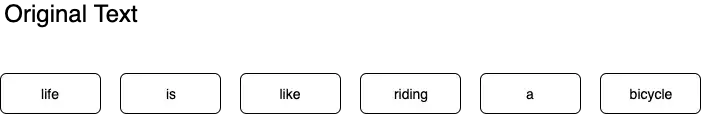

**Let us use ‘life’ as a context word as an example. Because we took window size as 2, the words ‘is’ and ‘like’ are the targets.**

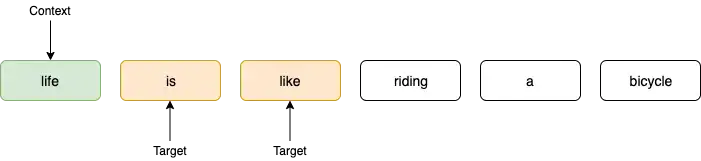

**Below are the context and its corresponding targets.**

| Context | Target |
|---------|--------|
| life    | is     |
| life    | like   |

**Just to make sure this idea is understood, the same step is repeated for another context word ‘riding’.**

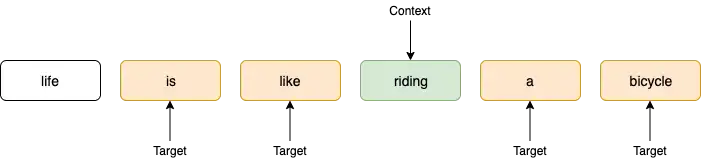

**Below are the context and its corresponding targets.**

| Context   | Target  |
|-----------|---------|
| riding    | is      |
| riding    | like    |
| riding    | a       |
| riding    | bicycle |

**With this understanding, the context and target word combinations can be built for the entire corpus.**

**Here, a neural network is used to predict a target word using a context word. As the neural network learns and updates the weights of the hidden layer with a large enough corpus, these weights will magically become our word vectors that represent the context word.**

## The Network

**Now that the context and target are available, a single layer neural network is used to predict the target words using the context words. Let’s dig a little deeper into what the neural network looks like.**

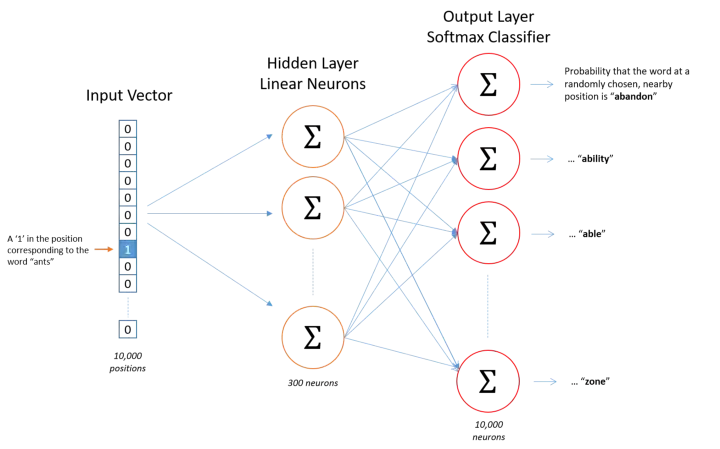

### Input layer

**As mentioned above, both the source and the target are the words picked from the corpus for the training of the neural network. The way each word is represented as input is using a one-hot encoded approach.**

**If there are 10,000 unique words in the corpus, the input is an array of length 10,000 where only one of them is ‘1’ and rest are zero for any word.**

**Let us observe how the input vectors look like for the example we have taken above. Below are the one-hot representations of words we have taken(in real life, the words are sorted in alphabetical order before one-hot vectors are assigned).**

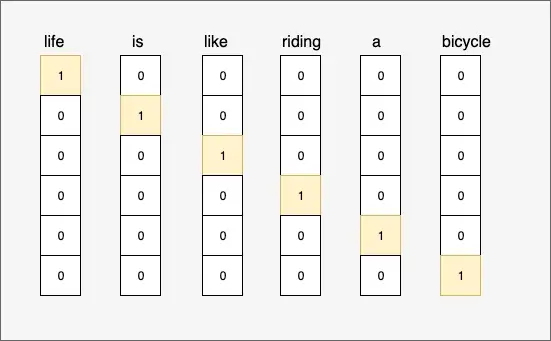

### Output Layer

**The output of the neural network is the probability of a particular word being ‘nearby’ for the given input word. If there are 10,000 words in the corpus, the output layer is an array of length 10,000 and each element is a value between 0 and 1 representing the probability of a target word occurring along with the context word.**

### Training

**The neural network predicts a target word given an input word. The neural network takes the one-hot representation of input word as input and predicts the probability for each of the target words as output. For training the model and to minimize the loss, we need the actual values to compare with the predicted values and to calculate the loss. The one-hot representation of the target words will serve as the actual values of the output layer for this purpose. A Softmax layer is used at the output of the neural network.**

**Let us observe how the network will look like for the example sentence taken. Here, ‘riding’ is considered the center word while ‘bicycle’ is the target**

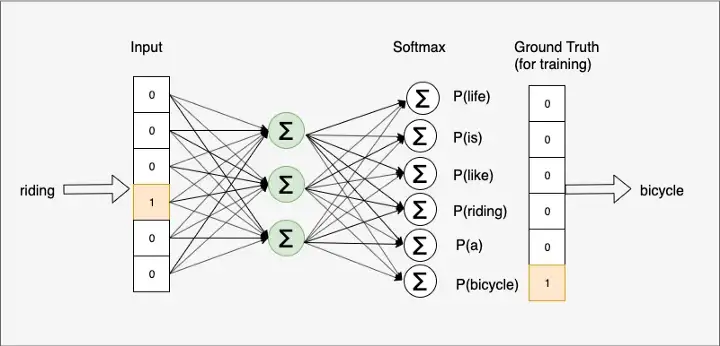

### Hidden Layer

**Here is where all the magic happens!!**

**The number of neurons in the hidden layer will define how (and to what dimension) we ‘embed’ the 10,000 length sparse vectors. Let us take 50 as the dimension of the hidden layer. This means we are creating 50 features for each word that passes through the network.**

**Let us now focus on the weights. in our example, the input layer is of size 10,000 and we just decided that the hidden layer is of size 50. Hence, the Weights matrix is of size (50 x 10000)**

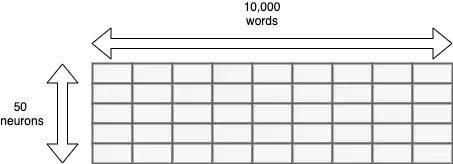

**Firstly, let us look at weights from the hidden layer perspective. For the first neuron in the hidden layer, there are 10,000 input connections one from each element of the input array. But, because the input layer is a one-hot representation, only one of input will be coming in as ‘1’ and the rest of the inputs are zeroes. So, only one of the 10,000 weights will be passed on to the activation function for any word. this is true for all the 50 neurons in the hidden layer.**

**Now, let us look at the weights from the input layer perspective. For any word, only one element of the input array is ‘1’ out of 10,000 because of one-hot representation. For that input element, there are 50 connections (weights) to each of the 50 neurons in the hidden layer. when the next word comes as input, another input element will have a value of 1 and it will have its own 50 connections (weights) to the hidden layer. So, in a way, each word in the corpus will have its own set of 50 weights which will be used when that word appears in the context.**

**These 50 weights are the word vectors that represent the words in the corpus.**

### Intuition

**This is where things will get clear. Let us say two words have a similar context. If we take all the words occurring around the first word and all the words occurring around the second word, it is fair to say there will be some words in common. From the neural network perspective, in this case, two different context words are giving the same target words as output. Hence, weights for these context words will be updated similarly.**

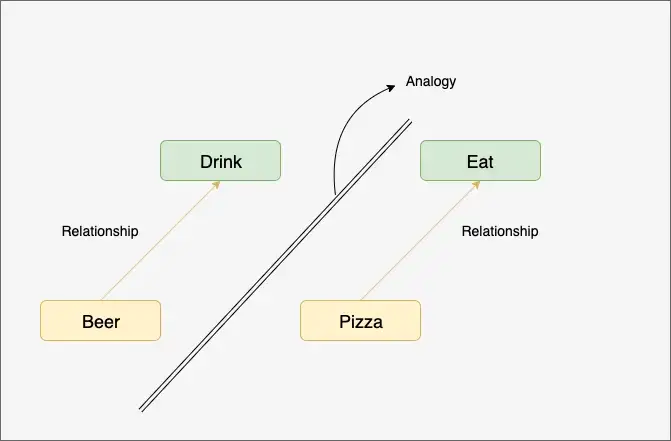

**As a larger number of target words turn out to be the same for two context words, their weight updates will be similar to each other. Hence, the final weights for the two context words will be close to each other. With a large corpus and good enough dimension of the hidden layer, these weights will turn out to be good spatial representations of the words.**

**With these weights, we can perform several tasks ranging from finding similar words, word analogies (e.g. king is to a man like a queen is to a woman) to more complex tasks like Named entity recognition, parts of speech tagging, etc**

**When Google published its paper on Word2Vec, it used a 300 dimension vector representation and the training is done on Google News articles.**

## Word2Vec

In [4]:
import nltk, string, gensim
from nltk.corpus import abc
nltk.download('abc')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package abc to /home/dai/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /home/dai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/dai/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
abc.sents()

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [14]:
len(abc.sents())

29059

In [10]:
model = gensim.models.Word2Vec(abc.sents())

In [18]:
X = list(model.wv.vocab)
data = model.most_similar('science')
print(data)

[('law', 0.9383911490440369), ('policy', 0.9283448457717896), ('general', 0.9270026087760925), ('agriculture', 0.9251447916030884), ('media', 0.9197767376899719), ('practice', 0.9179914593696594), ('discussion', 0.9152432084083557), ('board', 0.9132623672485352), ('exhibition', 0.9096375703811646), ('Crean', 0.9090235829353333)]


/tmp/ipykernel_556848/3557662336.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  data = model.most_similar('science')


In [20]:
import json
json_file = 'intents.json'
with open('intents.json','r') as f:
    data = json.load(f)

In [21]:
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [22]:
import pandas as pd
df = pd.DataFrame(data)
df['patterns'] = df['patterns'].apply(', '.join)
df

,tag,patterns,responses
0,welcome,"Hi, How are you, Is any one to talk?, Hello, h...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"Bye, See you later, Goodbye, I will come back ...","[See you later, thanks for visiting, have a gr..."
2,thankful,"Thanks for helping me, Thank your guidance, Th...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"What hours are you open?, Tell your opening ti...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"Can I pay using credit card?, Can I pay using...","[We accept VISA, Mastercard and credit card, W..."


In [25]:
from nltk.corpus import stopwords
from textblob import Word
stop = stopwords.words('english')

### Data Cleaning
# ↓

In [42]:
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x.lower()for x in x.split()))
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x for x in x.split() if x not in string.punctuation))
df['patterns'] = df['patterns'].str.replace('[^\w\s]','')
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x for x in x.split() if  not x.isdigit()))  
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x for x in x.split() if  not x in stop))
df['patterns'] = df['patterns'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))  

/tmp/ipykernel_556848/2589004131.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['patterns'] = df['patterns'].str.replace('[^\w\s]','')


In [43]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thanks helping thank guidance thats helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hour open tell opening time open timing please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay using credit card pay using mastercard pay...,"[We accept VISA, Mastercard and credit card, W..."


In [44]:
from gensim.models import Word2Vec


In [45]:
# taking the outer list
bigger_list = []
for i in df['patterns']:
    li = i.split()
    bigger_list.append(li)

In [46]:
bigger_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thanks', 'helping', 'thank', 'guidance', 'thats', 'helpful', 'kind'],
 ['hour', 'open', 'tell', 'opening', 'time', 'open', 'timing', 'please'],
 ['pay',
  'using',
  'credit',
  'card',
  'pay',
  'using',
  'mastercard',
  'pay',
  'using',
  'cash']]

In [47]:
# costom data is fed to machine for further processing
model = Word2Vec(bigger_list, min_count = 1, size = 300 , workers = 4)
print(model)

Word2Vec(vocab=32, size=300, alpha=0.025)


### Saving the model

In [48]:
model.save("word2vec.model")
model.save("word2vec_model.bin")

### After saving the model we can load the model again in same program other program or other system altogether this introduces re-usability of the models

### we loaded vocab from the saved model

new_model = Word2Vec.load('word2vec_model.bin')

In [50]:
vocab = list(new_model.wv.vocab)
vocab

['hi',
 'one',
 'talk',
 'hello',
 'available',
 'bye',
 'see',
 'later',
 'goodbye',
 'come',
 'back',
 'soon',
 'thanks',
 'helping',
 'thank',
 'guidance',
 'thats',
 'helpful',
 'kind',
 'hour',
 'open',
 'tell',
 'opening',
 'time',
 'timing',
 'please',
 'pay',
 'using',
 'credit',
 'card',
 'mastercard',
 'cash']

In [52]:
similar_words = new_model.wv.most_similar('thanks') # we are using the pre-saved model that we loaded now with 
                                                    # name new_mode to print the most similar words to the word
                                                    # that we pass as parameter to it
                                                    # the numbers are cosine similarity values of similar words
                                                    # sorted in higher to lower order
print(similar_words)

[('goodbye', 0.12389042973518372), ('card', 0.06821712851524353), ('credit', 0.06789609044790268), ('available', 0.06731794774532318), ('thats', 0.061993759125471115), ('soon', 0.050058431923389435), ('open', 0.04474076256155968), ('talk', 0.03797003626823425), ('please', 0.037539638578891754), ('hello', 0.031893789768218994)]


In [53]:
similar_words = new_model.wv.most_similar('hello')
print(similar_words)

[('bye', 0.09851101040840149), ('tell', 0.07716533541679382), ('helpful', 0.07353554666042328), ('soon', 0.07117362320423126), ('guidance', 0.07022233307361603), ('later', 0.06645448505878448), ('available', 0.06288708001375198), ('using', 0.05938415974378586), ('cash', 0.05435705557465553), ('pay', 0.0511045977473259)]


In [56]:
similar_words = new_model.wv.most_similar('available')
print(similar_words[:3])

[('cash', 0.12142164260149002), ('hi', 0.09380832314491272), ('hour', 0.08803293853998184)]


In [61]:
dissimilar_words = model.wv.doesnt_match("see you later, thanks for visiting".split())
print(dissimilar_words)

see


In [64]:
# !pip3 install ktrain flask